<a href="https://colab.research.google.com/github/wtcero/CCS8_Soft-eng/blob/main/Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Model Selection

**I. Understanding the Problem**

- Target variable: Depression (0 = No, 1 = Yes)
- Task: **Classification**, as the target variable is binary

*Key evaluation metrics for the problem:*

- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix

**II. Choosing Candidate Models**

- Since this is a binary classification problem (Yes/No for depression), the best approach is to start
with **Logistic Regression**—a simple, interpretable model that provides a good starting point.

- Considering that the dataset is generally small (< 100,000 rows), Logistic Regression is a model
which works well with small to medium-sized datasets, and has better explainability.

- If the Logistic Regression model underperforms, then we may test more complex models (e.g.
Random Forest, Support Vector Machines (SVM), or k-NN) to compare.


# Step 2: Model Training

**Logistic Regression Model**

Accuracy: 0.8464
Precision: 0.8567
Recall: 0.8857
F1-score: 0.8710

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      3470
           1       0.86      0.89      0.87      4901

    accuracy                           0.85      8371
   macro avg       0.84      0.84      0.84      8371
weighted avg       0.85      0.85      0.85      8371



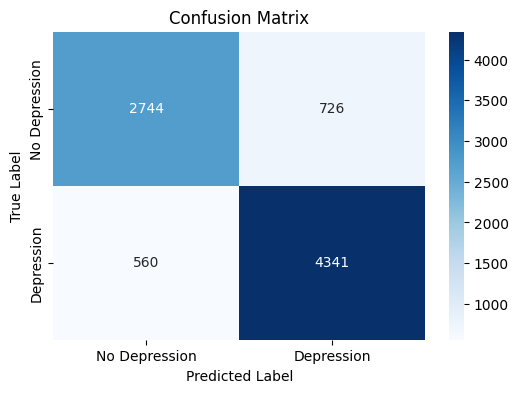

Training Accuracy: 0.8460
Testing Accuracy: 0.8464
The model may be underfitting (high bias). Consider adding more features or using a more complex model.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# Load dataset
df = pd.read_csv("Cleaned_Student_Depression_Dataset.csv")

# Split dataset into features and target
X = df.drop(columns=['Depression'])
y = df['Depression']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:\n", class_report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Depression", "Depression"],
            yticklabels=["No Depression", "Depression"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Analyze Bias-Variance Tradeoff
train_accuracy = accuracy_score(y_train, log_reg.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy:
    print("The model may be overfitting (high variance). Consider regularization or simplifying the model.")
elif train_accuracy == test_accuracy:
    print("The model may be well-balanced between bias and variance.")
else:
    print("The model may be underfitting (high bias). Consider adding more features or using a more complex model.")



---

**Random Forest Model**

Accuracy: 0.8374
Precision: 0.8480
Recall: 0.8800
F1-score: 0.8637

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      3470
           1       0.85      0.88      0.86      4901

    accuracy                           0.84      8371
   macro avg       0.83      0.83      0.83      8371
weighted avg       0.84      0.84      0.84      8371



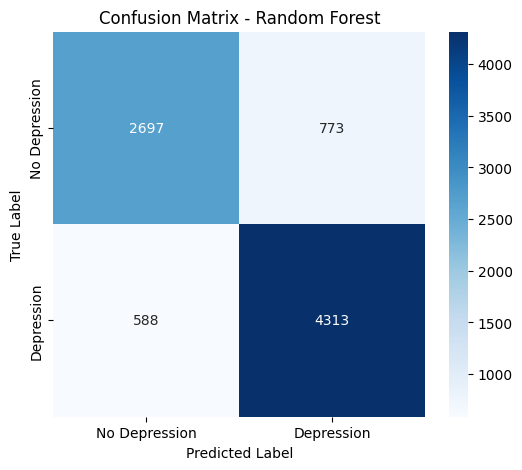

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Load cleaned dataset
file_path = "Cleaned_Student_Depression_Dataset.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Split dataset into features and target variable
X = df.drop(columns=['Depression'])
y = df['Depression']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Display results
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")
print("\nClassification Report:\n", class_report_rf)

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Depression", "Depression"],
            yticklabels=["No Depression", "Depression"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Step 3: Model Evaluation

**Logistic Regression Model**

Evaluation Metrics:
- Accuracy: 84.3%

The model correctly classified 84.3% of
the students, meaning it performs well
overall. However, accuracy alone is not always the
best metric, especially when dealing with
imbalanced datasets.

- Precision: 85.79%

Out of all students predicted to have
depression, 85.79% were actually
depressed.

- Recall: 87.73%

Out of all students who actually have
depression, the model correctly
identified 87.73% of them.

- F1-Score: 86.75%

The 86.75% F1-score indicates that the
model is making a good trade-off
between precision and recall.

- Confusion Matrix:

1. True Negatives (1838): The model correctly predicted "No Depression" for 1838 students.
2. False Positives (475): The model incorrectly classified 475 students as "Depressed" when they were actually not.
3. False Negatives (401): The model incorrectly classified 401 students as "No Depression" when they were actually "Depressed."
4. True Positives (2867): The model correctly predicted "Depression" for 2867 students.



---


**Logistic Regression Model**

Evaluation Metrics:
- Accuracy: 83.74%

The model correctly predicted depression status for 83.74% of the test cases.

- Precision: 84.80%

When the model predicted depression, it was correct 84.80% of the time.

- Recall: 88.00%

The model correctly identified 88.00% of the actual depression cases.

- F1-Score: 86.37%

The 86.37% F1-score indicates that the model is making a good trade-off between precision and recall.

- Confusion Matrix:

1. True Positives (4313): Correctly predicted cases of depression.
2. True Negatives (2697): Correctly predicted non-depression cases.
3. False Positives (773): Incorrectly predicted depression when it wasn’t present.
4. False Negatives (588): Missed actual depression cases.




---

**Overall Model Comparison**

* **Logistic Regression slightly outperforms Random Forest in accuracy, precision, and recall** while maintaining greater interpretability for the Student Depression Dataset.

* Logistic Regression has fewer false negatives (475 vs. 588) than Random Forest, meaning it misses fewer actual depression cases.
* Random Forest, however, has more false positives (773 vs. 401), leading to more misclassifications of non-depressed students as depressed.

* **Since Logistic Regression offers a slightly better trade-off between precision, recall, and overall accuracy, it is the preferred model in this case**.

* If the goal is capturing more complex relationships
between features, Random Forest may be explored further, but it needs optimization to reduce false positives. Additional fine-tuning (e.g., adjusting classification thresholds or feature selection) could improve both models further.

# Step 4: Model Improvement

**Logistic Regression Hyperparameter Tuning**

Tuned Logistic Regression **slightly improves model performance**, especially recall, meaning it
detects more depression cases correctly.

Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.8476
Precision: 0.8555
Recall: 0.8900
F1-score: 0.8724

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81      3470
           1       0.86      0.89      0.87      4901

    accuracy                           0.85      8371
   macro avg       0.85      0.84      0.84      8371
weighted avg       0.85      0.85      0.85      8371



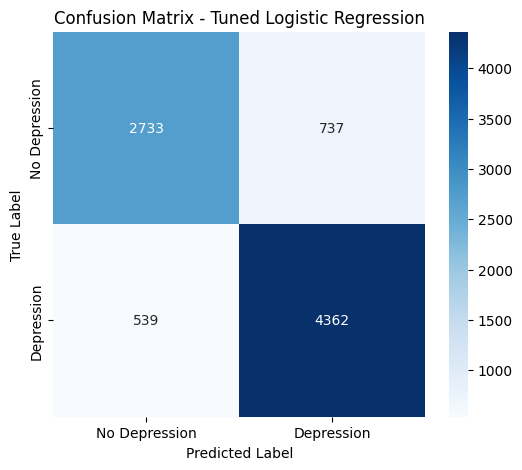

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Cleaned_Student_Depression_Dataset.csv")

# Split dataset
X = df.drop(columns=['Depression'])
y = df['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Logistic Regression model and hyperparameter grid
log_reg = LogisticRegression(max_iter=1000, random_state=42)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],       # Regularization type
    'solver': ['liblinear', 'saga'] # Optimization solvers
}

# Perform GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the best model
best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:\n", class_report)

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.show()


---

**Random Forest Hyperparameter Tuning**

Tuned Random Forest **slightly improves** model performance, particularly recall, meaning it detects more
depression cases correctly. However, the high training accuracy (96.90%) compared to testing accuracy
(84.00%) suggests **overfitting**.

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8437
Precision: 0.8504
Recall: 0.8896
F1-score: 0.8696

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81      3470
           1       0.85      0.89      0.87      4901

    accuracy                           0.84      8371
   macro avg       0.84      0.83      0.84      8371
weighted avg       0.84      0.84      0.84      8371



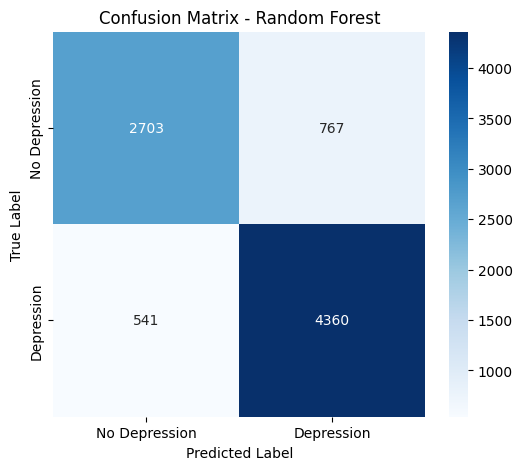

Training Accuracy: 0.9182
Testing Accuracy: 0.8437
The model may be overfitting (high variance). Consider adjusting hyperparameters further.


In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train Random Forest model with best parameters
rf_model = RandomForestClassifier(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Display results
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")
print("\nClassification Report:\n", class_report_rf)

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Depression", "Depression"],
            yticklabels=["No Depression", "Depression"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Analyze Bias-Variance Tradeoff
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

diff = abs(train_accuracy - test_accuracy)
if diff > 0.05:
    print("The model may be overfitting (high variance). Consider adjusting hyperparameters further.")
elif diff < 0.02:
    print("The model may be well-balanced between bias and variance.")
else:
    print("The model may be underfitting (high bias). Consider fine-tuning hyperparameters.")